# Importing libraries

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import warnings

# Defining Functions

In [50]:
# used
def count_by_group(x_ax , group_by):
    # Plot count plots with `hue` for placeRating
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x_ax, hue=group_by, palette='Set2')

    # Add labels, title, and legend
    plt.xlabel(x_ax)
    plt.ylabel('Count')
    plt.title(f'Count of {x_ax}, Grouped by {group_by}')
    plt.legend(title=f'{group_by}', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
# To show frequency diagrams
def plot_hist(df_name, xvar_name):
    plt.hist(df_name[xvar_name].values)
    plt.xlabel(f"{xvar_name} categories")
    plt.ylabel("Count per each category")
    plt.show()

In [ ]:
def bar_plots(df_name,xvar_name):
    plt.bar(df_name[xvar_name].values, df_name)
    plt.xlabel(f"{xvar_name} categories")
    plt.ylabel("Count per each category")
    plt.show()

c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing 

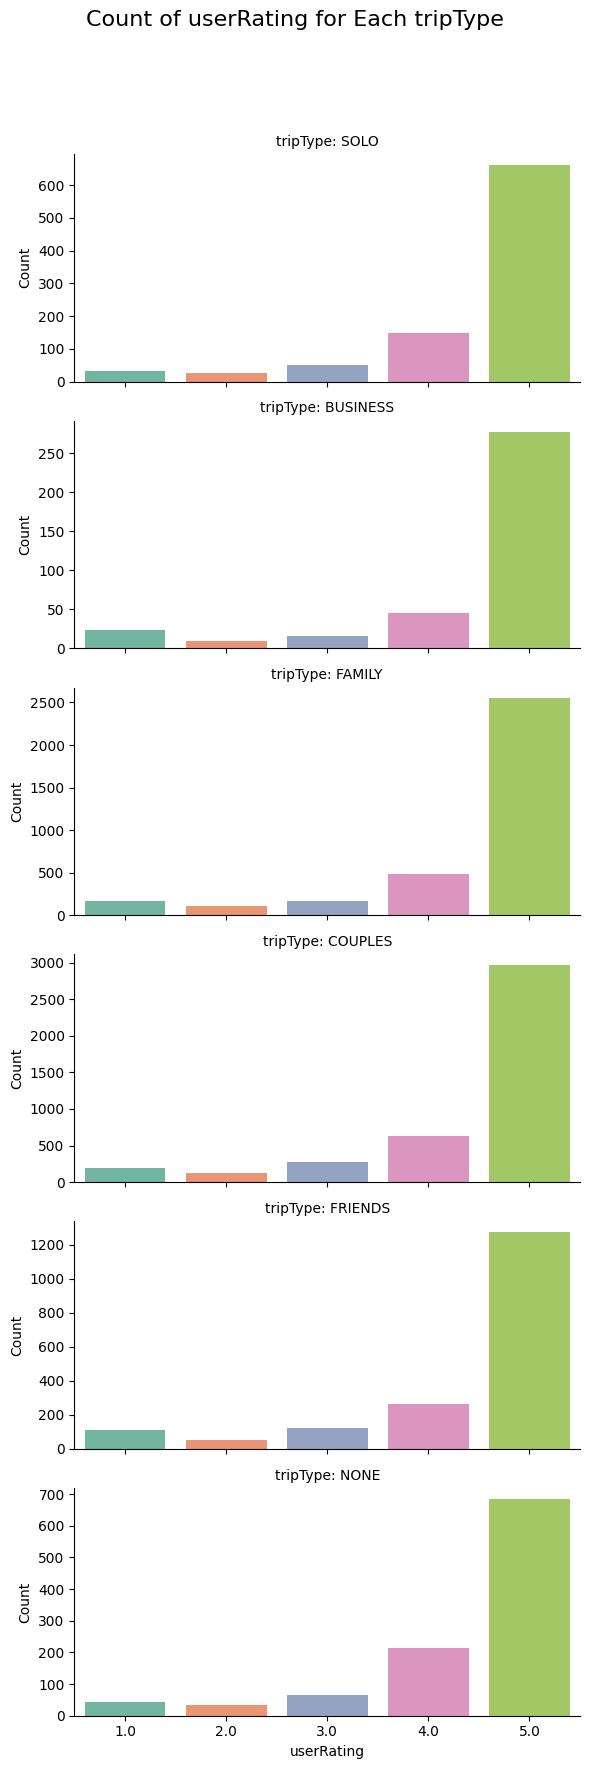

In [ ]:
def facet_vertical(x_ax, row_group):
    warnings.filterwarnings("ignore")
    # Handle missing data
    data_cleaned = df.dropna(subset=[x_ax, row_group])
    
    # Use FacetGrid to create vertically aligned count plots
    g = sns.FacetGrid(data_cleaned, row=row_group, height=3, aspect=2, sharex=True, sharey=False)

    # Map Seaborn's countplot to the grid
    g.map(sns.countplot, x_ax, 
          order=sorted(data_cleaned[x_ax].unique()), 
          palette="Set2")

    # Adjust titles and layout
    g.set_titles(f"{row_group}: {{row_name}}")
    g.set_axis_labels(f"{x_ax}", "Count")
    g.fig.subplots_adjust(top=0.9)  # Adjust space at the top
    g.fig.suptitle(f"Count of {x_ax} for Each {row_group}", fontsize=16)

    plt.show()
    
# facet_vertical('userRating', 'tripType')

# Loading Dataset

In [75]:
df = pd.read_csv("../data/dataset_cleaned.csv")

In [3]:
df.shape

(11809, 24)

In [4]:
df['city'].describe()

count       11759
unique         24
top       Colombo
freq         1997
Name: city, dtype: object

In [80]:
df['placeName'].describe()

count                     11809
unique                      239
top       Nh Collection Colombo
freq                         50
Name: placeName, dtype: object

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   helpfulVotes       11808 non-null  float64
 1   id                 11808 non-null  float64
 2   address            11808 non-null  object 
 3   city               11758 non-null  object 
 4   placeName          11808 non-null  object 
 5   numberOfReviews    11808 non-null  int64  
 6   placeRating        11808 non-null  float64
 7   webUrl             11808 non-null  object 
 8   publishedDate      11808 non-null  object 
 9   userRating         11808 non-null  float64
 10  roomTip            1988 non-null   object 
 11  review_text        11808 non-null  object 
 12  review_title       11808 non-null  object 
 13  travelDate         11799 non-null  object 
 14  tripType           11799 non-null  object 
 15  username           11808 non-null  object 
 16  word_tokens        118

In [121]:
print(df.sample(2))

      helpfulVotes           id                                     address  \
7186           0.0  947791203.0  64, Peddlers Street, Galle 80000 Sri Lanka   
9663           0.0  740104905.0   84 Peradeniya Road, Kandy 20000 Sri Lanka   

       city                placeName  numberOfReviews  placeRating  \
7186  Galle  The Merchant Galle Fort              328          5.0   
9663  Kandy        Sevana City Hotel             1030          4.5   

                                                 webUrl publishedDate  \
7186  https://www.tripadvisor.com/Hotel_Review-g2978...    2024-04-21   
9663  https://www.tripadvisor.com/Hotel_Review-g3041...    2020-01-19   

      userRating  ... tripType   username  \
7186         5.0  ...  COUPLES  Cassygirl   
9663         4.0  ...  COUPLES   dinahutr   

                                            word_tokens  \
7186  ['popped', 'hot', 'morning', 'stroll', 'around...   
9663  ['location', 'great', 'five', 'min', 'walk', '...   

                 

In [4]:
df.sample(5)

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,...,tripType,username,word_tokenization,bpe_tokenization,bigram_tokenization,trigram_tokenization,whitespace_tokenization,rule_tokenization,spacy_tokenization,wordpiece_tokenization
9231,0.0,880064980.0,"Amunugama Walawwa, Kundasale 20270 Sri Lanka",Kundasale,The Kandy House,860,4.5,https://www.tripadvisor.com/Hotel_Review-g1199...,2023-02-25,5.0,...,COUPLES,LouiseM976,"['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['▁fabulous', '▁oasis', '▁calm', '▁close', '▁k...","[('fabulous', 'oasis'), ('oasis', 'calm'), ('c...","[('fabulous', 'oasis', 'calm'), ('oasis', 'cal...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kan', ..."
9985,0.0,978194110.0,"No 01 Glen Fall Road, Nuwara Eliya 22200 Sri L...",Nuwara Eliya,Araliya Green City,1517,5.0,https://www.tripadvisor.com/Hotel_Review-g6085...,2024-10-31,5.0,...,FAMILY,xitiv2024,"['make', 'stay', 'comfortable', 'make', 'feel'...","['▁make', '▁stay', '▁comfortable', '▁make', '▁...","[('make', 'stay'), ('stay', 'comfortable'), ('...","[('make', 'stay', 'comfortable'), ('stay', 'co...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'..."
1293,1.0,953023985.0,"102A, Kirulapone Avenue Baseline Road, Colombo...",Colombo,Best Western Elyon Colombo,784,4.0,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-05-30,5.0,...,SOLO,Ryan777392312,"['wonderful', 'stay', 'delicious', 'food', 'ex...","['▁wonderful', '▁stay', '▁delicious', '▁food',...","[('wonderful', 'stay'), ('stay', 'delicious'),...","[('wonderful', 'stay', 'delicious'), ('stay', ...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex..."
8425,0.0,965103135.0,"#12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",Kandy,Grand Serendib Hotel,191,4.5,https://www.tripadvisor.com/Hotel_Review-g3041...,2024-08-16,5.0,...,FAMILY,B636MIjamesm,"['view', 'absolute', 'best', 'thing', 'hotel',...","['▁view', '▁absolute', '▁best', '▁thing', '▁ho...","[('view', 'absolute'), ('absolute', 'best'), (...","[('view', 'absolute', 'best'), ('absolute', 'b...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',..."
10598,0.0,967275686.0,"Mahagastota Hill Climb Blackpool, Nuwara Eliya...",Nuwara Eliya,The Blackpool Resort & Spa,1150,4.5,https://www.tripadvisor.com/Hotel_Review-g6085...,2024-08-28,5.0,...,FAMILY,kumarjain748,"['good', 'reasort', 'stay', 'good', 'food', 'e...","['▁good', '▁re', 'as', 'ort', '▁stay', '▁good'...","[('good', 'reasort'), ('reasort', 'stay'), ('s...","[('good', 'reasort', 'stay'), ('reasort', 'sta...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 're', '##as', '##ort', 'stay', 'good'..."


# Missing Values

In [120]:
df.loc[:,'id':'city'].groupby(['city'], dropna=False).size()

city
Ahangama          50
Ahungalla        100
Ampitiya          50
Arugam Bay       492
Bentota          348
Colombo         1997
Ella            1947
Galle            550
Gurudeniya        50
Hantana           50
Heerassagala      99
Hikkaduwa        400
Kandy           1447
Koggala          100
Kosgoda           50
Kundasale        100
Miwaladeniya      50
Nuwara Eliya    1929
Pottuvil         438
Rathgama          50
Trincomalee      912
Unawatuna        449
Wattegama         50
Werapitiya        50
NaN               50
dtype: int64

# Frequency Distribution - Single Level

#### Number of reviews per each city

In [6]:
df.groupby("city")['city'].count().sort_values()

city
Ahangama          50
Ampitiya          50
Hantana           50
Gurudeniya        50
Kosgoda           50
Wattegama         50
Rathgama          50
Miwaladeniya      50
Werapitiya        50
Heerassagala      99
Ahungalla        100
Kundasale        100
Koggala          100
Bentota          348
Hikkaduwa        400
Pottuvil         438
Unawatuna        449
Arugam Bay       492
Galle            550
Trincomalee      913
Kandy           1448
Nuwara Eliya    1927
Ella            1948
Colombo         1997
Name: city, dtype: int64

#### Number of Reviews per each Hotel

In [17]:
# Number of reviews per each hotel
df.groupby("placeName")['placeName'].count().sort_values()

placeName
Wild Resort Ella                   34
Dutch Bay Beach Cottages           35
Ella Paddy Field View Guest Inn    38
Trinco Blue Waves                  40
Trincomalee Beach Resort & Spa     40
                                   ..
Trinco Blu By Cinnamon             50
Welcombe Hotel - Trinco            50
Whisky Point Resort                50
Yara Galle Fort                    50
Zion View Ella Green Retreat       50
Name: placeName, Length: 239, dtype: int64

#### Number of Reviews per Each Trip Type

In [18]:
df.groupby("tripType")['tripType'].count().sort_values()

tripType
BUSINESS     372
SOLO         918
NONE        1042
FRIENDS     1821
FAMILY      3470
COUPLES     4177
Name: tripType, dtype: int64

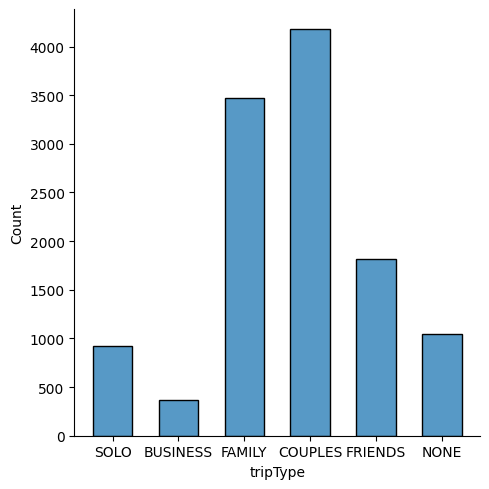

In [ ]:
sns.displot(df, x="tripType", shrink=0.6)

In [32]:
type(df["city"].values)

numpy.ndarray

#### Number of Reviews per Each PlaceRating

In [71]:
place_rating_count = df.groupby(["placeName","placeRating"])['placeRating'].count().sort_values().to_frame()
place_rating_count

,,placeRating
placeName,placeRating,
Wild Resort Ella,4.5,34
Dutch Bay Beach Cottages,4.0,35
Ella Paddy Field View Guest Inn,4.0,38
Trinco Blue Waves,4.5,40
Trincomalee Beach Resort & Spa,2.5,40
...,...,...
Trinco Blu By Cinnamon,4.5,50
Welcombe Hotel - Trinco,3.5,50
Whisky Point Resort,5.0,50


In [73]:
place_rating_count.rename(columns={"placeRating": "rating_count"}, inplace=True)
place_rating_count

,,rating_count
placeName,placeRating,
Wild Resort Ella,4.5,34
Dutch Bay Beach Cottages,4.0,35
Ella Paddy Field View Guest Inn,4.0,38
Trinco Blue Waves,4.5,40
Trincomalee Beach Resort & Spa,2.5,40
...,...,...
Trinco Blu By Cinnamon,4.5,50
Welcombe Hotel - Trinco,3.5,50
Whisky Point Resort,5.0,50


In [74]:
place_rating_count2 = place_rating_count.reset_index()
place_rating_count2

,placeName,placeRating,rating_count
0,Wild Resort Ella,4.5,34
1,Dutch Bay Beach Cottages,4.0,35
2,Ella Paddy Field View Guest Inn,4.0,38
3,Trinco Blue Waves,4.5,40
4,Trincomalee Beach Resort & Spa,2.5,40
...,...,...,...
234,Trinco Blu By Cinnamon,4.5,50
235,Welcombe Hotel - Trinco,3.5,50
236,Whisky Point Resort,5.0,50
237,Yara Galle Fort,5.0,50


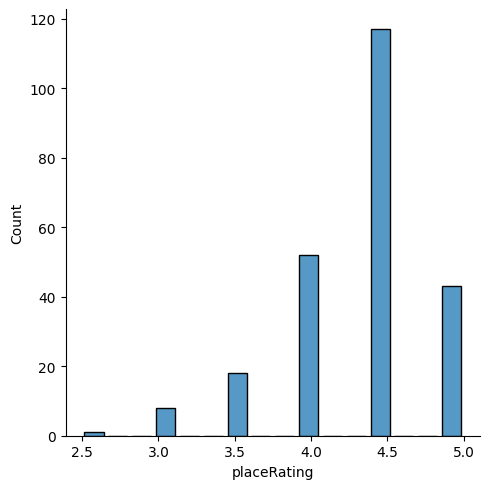

In [75]:
sns.displot(place_rating_count2, x="placeRating", shrink =.8)

#### Number of Reviews per Each User Rating

In [50]:
df.groupby("userRating")['userRating'].count().sort_values()

userRating
2.0     353
1.0     560
3.0     695
4.0    1786
5.0    8415
Name: userRating, dtype: int64

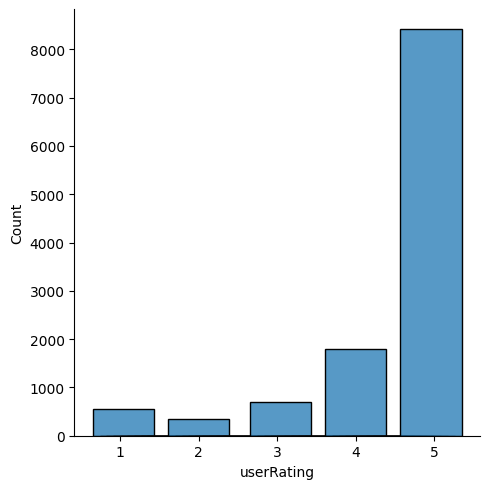

In [51]:
sns.displot(df, x="userRating", shrink =9)

In [ ]:
placeRating

y - place rating
horizontally divided for each rating in y
histogram of user rating for each place

In [5]:
df.columns

Index(['helpfulVotes', 'id', 'address', 'city', 'placeName', 'numberOfReviews',
       'placeRating', 'webUrl', 'publishedDate', 'userRating', 'roomTip',
       'review_text', 'review_title', 'travelDate', 'tripType', 'username',
       'word_tokenization', 'bpe_tokenization', 'bigram_tokenization',
       'trigram_tokenization', 'whitespace_tokenization', 'rule_tokenization',
       'spacy_tokenization', 'wordpiece_tokenization'],
      dtype='object')

# Frequency Distribution - Mulit Level

#### Number of review count of each trip grouped by user rating

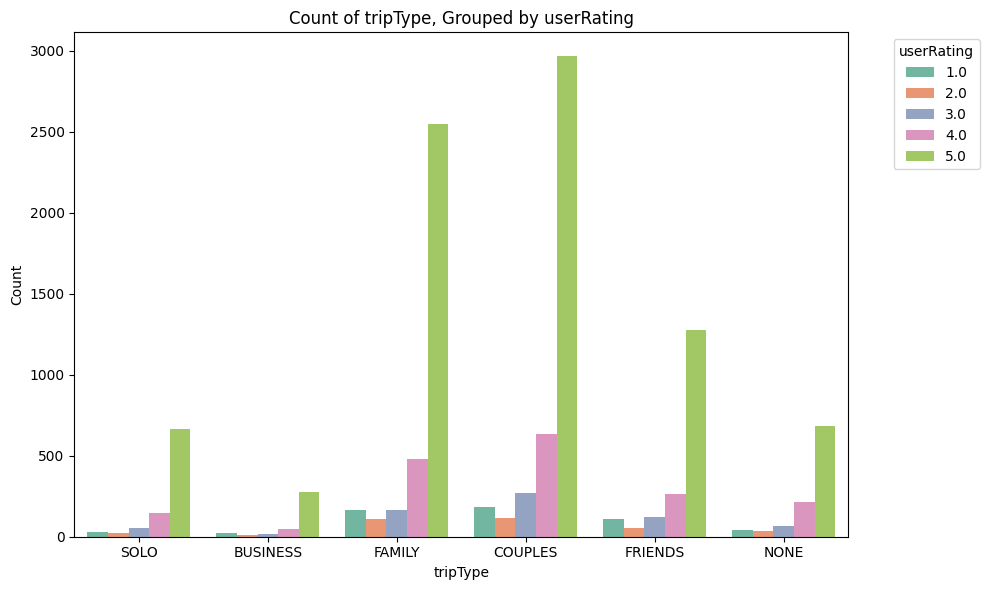

In [52]:
count_by_group(x_ax='tripType',
               group_by='userRating'
    
)

#### Number of review count of each user rating grouped by trip type

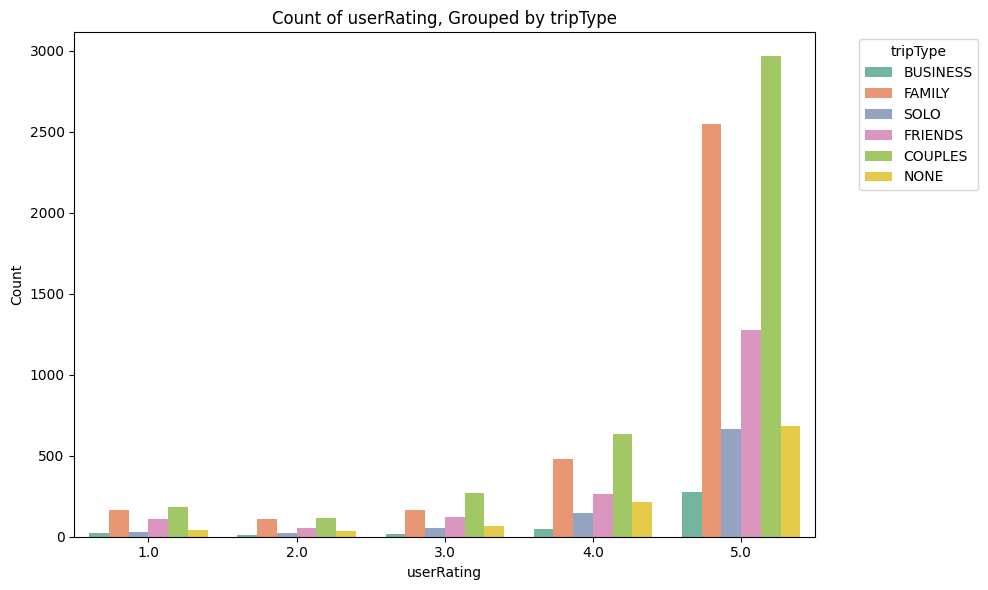

In [103]:
count_by_group(x_ax='userRating',
               group_by='tripType'
    
)

#### Number of review count of each trip grouped by place rating

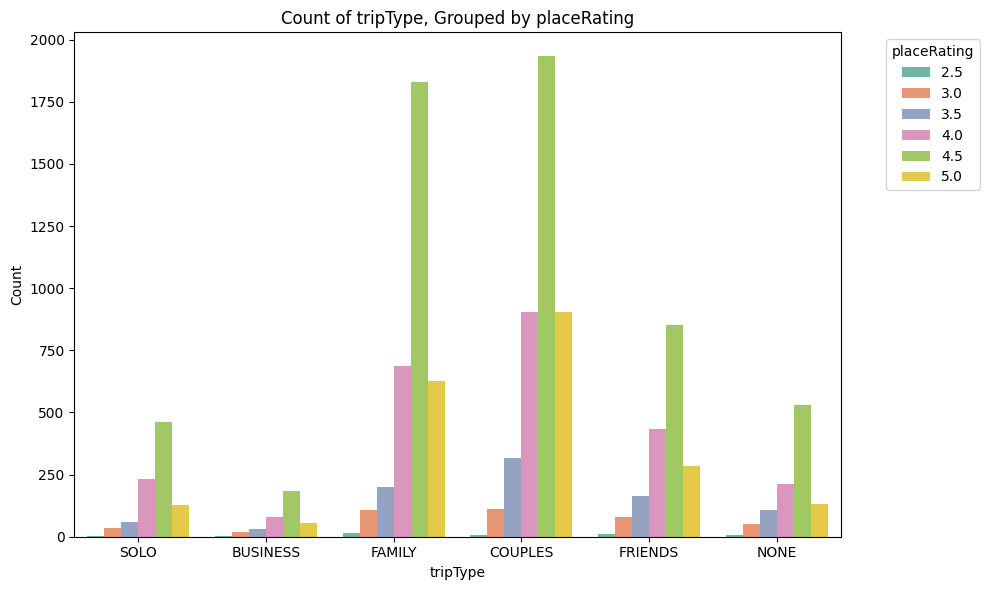

In [53]:
count_by_group(x_ax='tripType',
               group_by='placeRating'
    
)

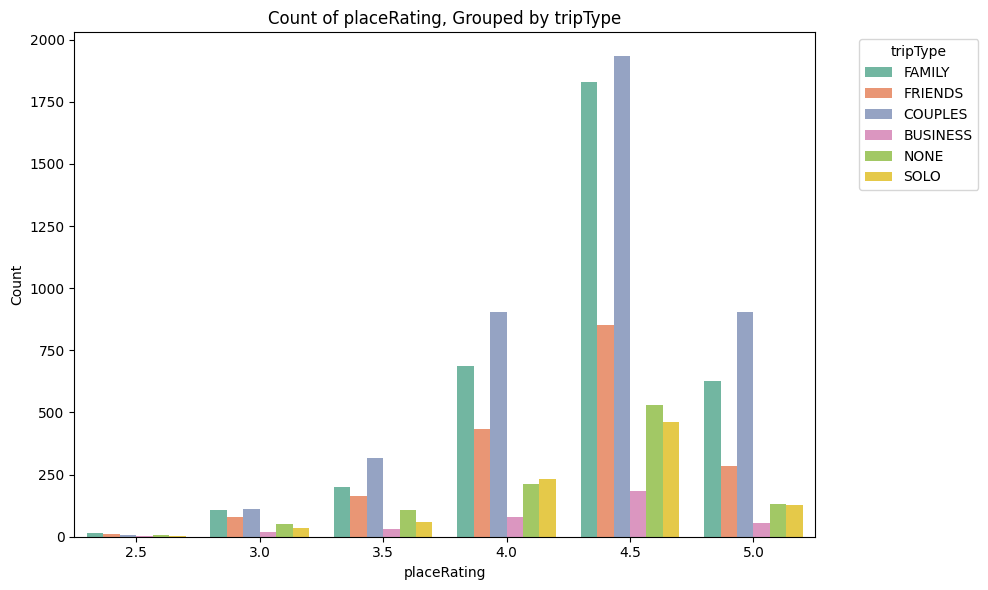

In [61]:
count_by_group(x_ax='placeRating',
               group_by='tripType'
    
)

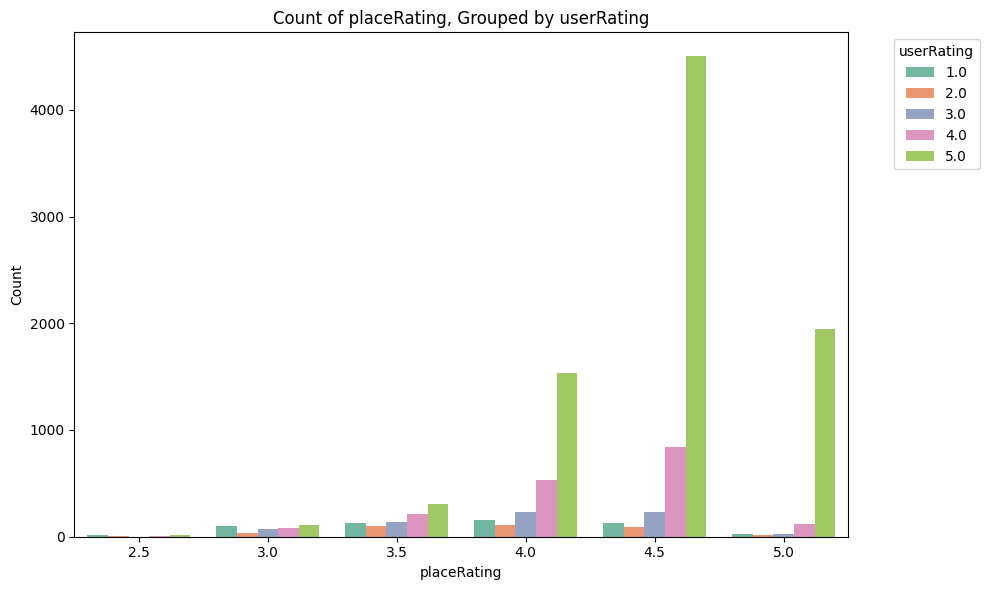

In [54]:
count_by_group(x_ax='placeRating',
               group_by='userRating'
    
)

Text(0.5, 1.0, 'Heatmap of User Rating vs. Place Rating')

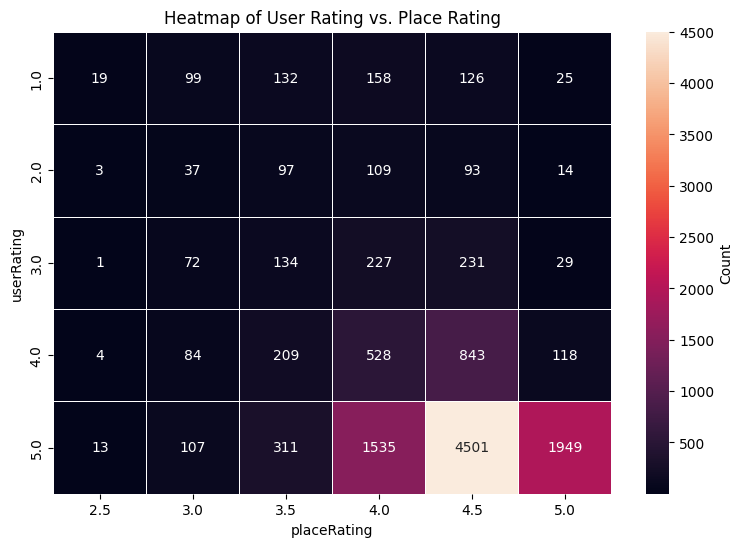

In [85]:

# Draw a heatmap with the numeric values in each cell
heatmap_data = df.groupby(['userRating', 'placeRating']).size().unstack()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidths=.5, ax=ax, cbar_kws={'label': 'Count'})
plt.title('Heatmap of User Rating vs. Place Rating')

# Test

#### stacked count plot

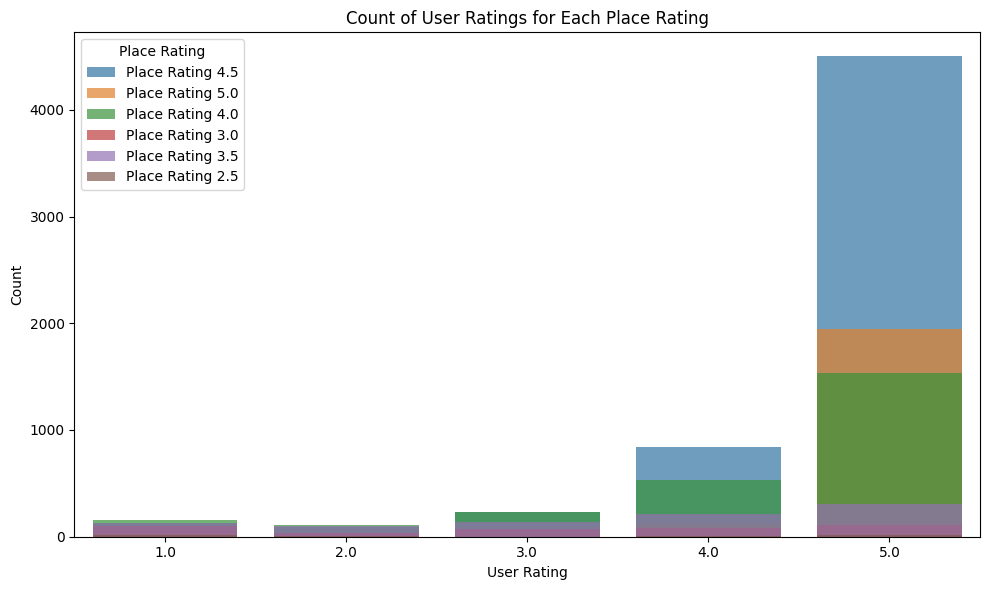

In [62]:
unique_place_ratings = df['placeRating'].unique()

plt.figure(figsize=(10, 6))

# Loop through each placeRating
for place_rating in unique_place_ratings:
    subset = df[df['placeRating'] == place_rating]
    sns.countplot(data=subset, x='userRating', label=f'Place Rating {place_rating}', alpha=0.7)

# Add labels and legend
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.title('Count of User Ratings for Each Place Rating')
plt.legend(title='Place Rating')

plt.tight_layout()
plt.show()


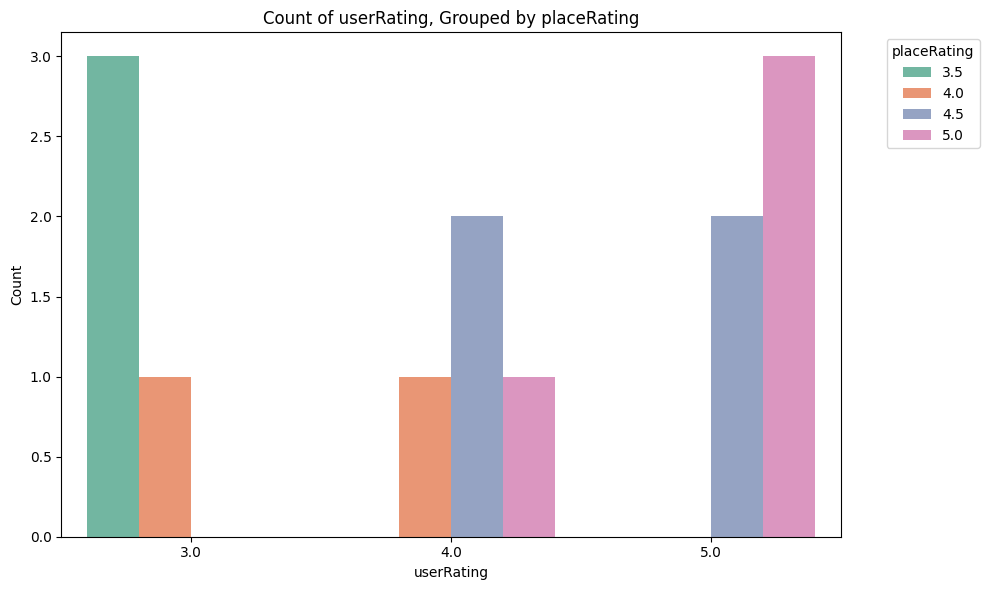

In [42]:
def count_by_group(x_ax , group_by):
    # Plot count plots with `hue` for placeRating
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x_ax, hue=group_by, palette='Set2')

    # Add labels, title, and legend
    plt.xlabel(x_ax)
    plt.ylabel('Count')
    plt.title(f'Count of {x_ax}, Grouped by {group_by}')
    plt.legend(title=f'{group_by}', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
    
count_by_group("userRating", "placeRating")

##### facetgrid

c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing 

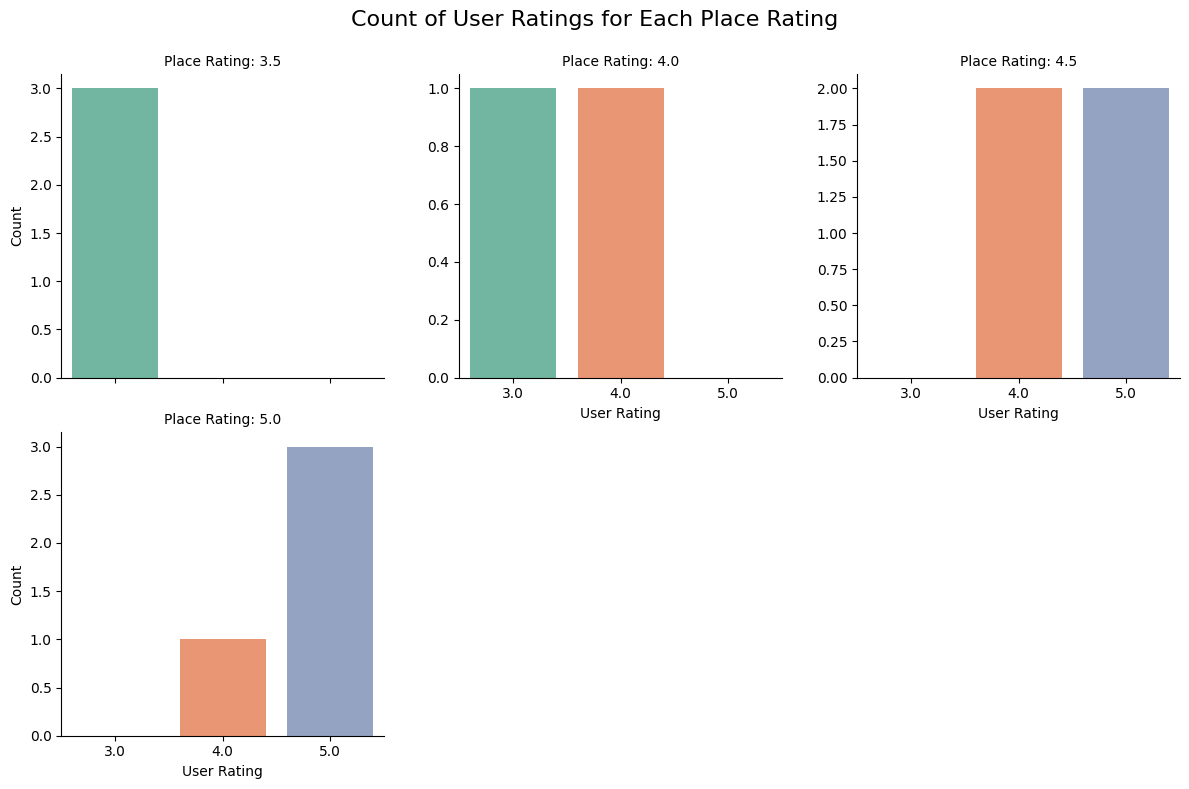

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'userRating': [3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 3.0, 5.0],
    'placeRating': [3.5, 4.0, 4.5, 5.0, 4.5, 5.0, 3.5, 4.0, 4.5, 4.5, 5.0, 3.5, 5.0]
}

df = pd.DataFrame(data)

# Use FacetGrid to create separate count plots for each `placeRating`
g = sns.FacetGrid(df, col="placeRating", col_wrap=3, height=4, sharex=True, sharey=False)

# Map Seaborn's countplot to the grid
g.map(sns.countplot, "userRating", order=sorted(df['userRating'].unique()), palette="Set2")

# Adjust titles and layout
g.set_titles("Place Rating: {col_name}")
g.set_axis_labels("User Rating", "Count")
g.fig.subplots_adjust(top=0.9)  # Adjust space at the top
g.fig.suptitle("Count of User Ratings for Each Place Rating", fontsize=16)

plt.show()


#### facetgrid vertical

c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Lisara\anaconda3\envs\NLPEnv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing 

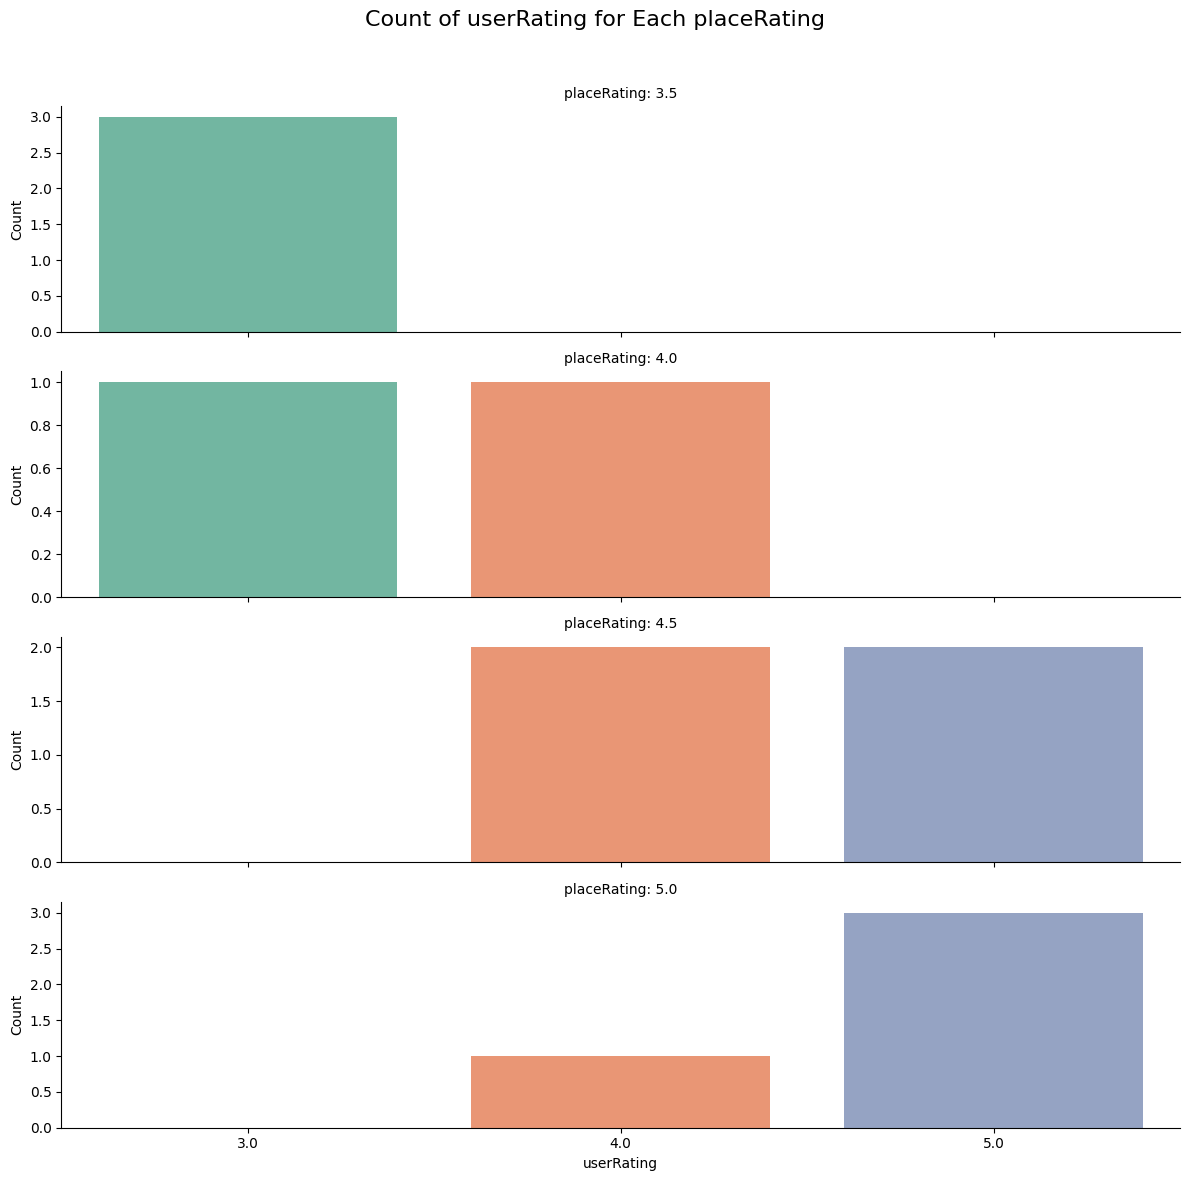

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'userRating': [3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 3.0, 5.0],
    'placeRating': [3.5, 4.0, 4.5, 5.0, 4.5, 5.0, 3.5, 4.0, 4.5, 4.5, 5.0, 3.5, 5.0]
}

df = pd.DataFrame(data)

def facet_vertical(x_ax, row_group):
    # Handle missing data
    data_cleaned = df.dropna(subset=[x_ax, row_group])
    
    # Use FacetGrid to create vertically aligned count plots
    g = sns.FacetGrid(data_cleaned, row=row_group, height=3, aspect=4, sharex=True, sharey=False)

    # Map Seaborn's countplot to the grid
    g.map(sns.countplot, x_ax, 
          order=sorted(data_cleaned[x_ax].unique()), 
          palette="Set2")

    # Adjust titles and layout
    g.set_titles(f"{row_group}: {{row_name}}")
    g.set_axis_labels(f"{x_ax}", "Count")
    g.fig.subplots_adjust(top=0.9)  # Adjust space at the top
    g.fig.suptitle(f"Count of {x_ax} for Each {row_group}", fontsize=16)

    plt.show()
    
facet_vertical('userRating', 'placeRating')


#### facet grid with colors

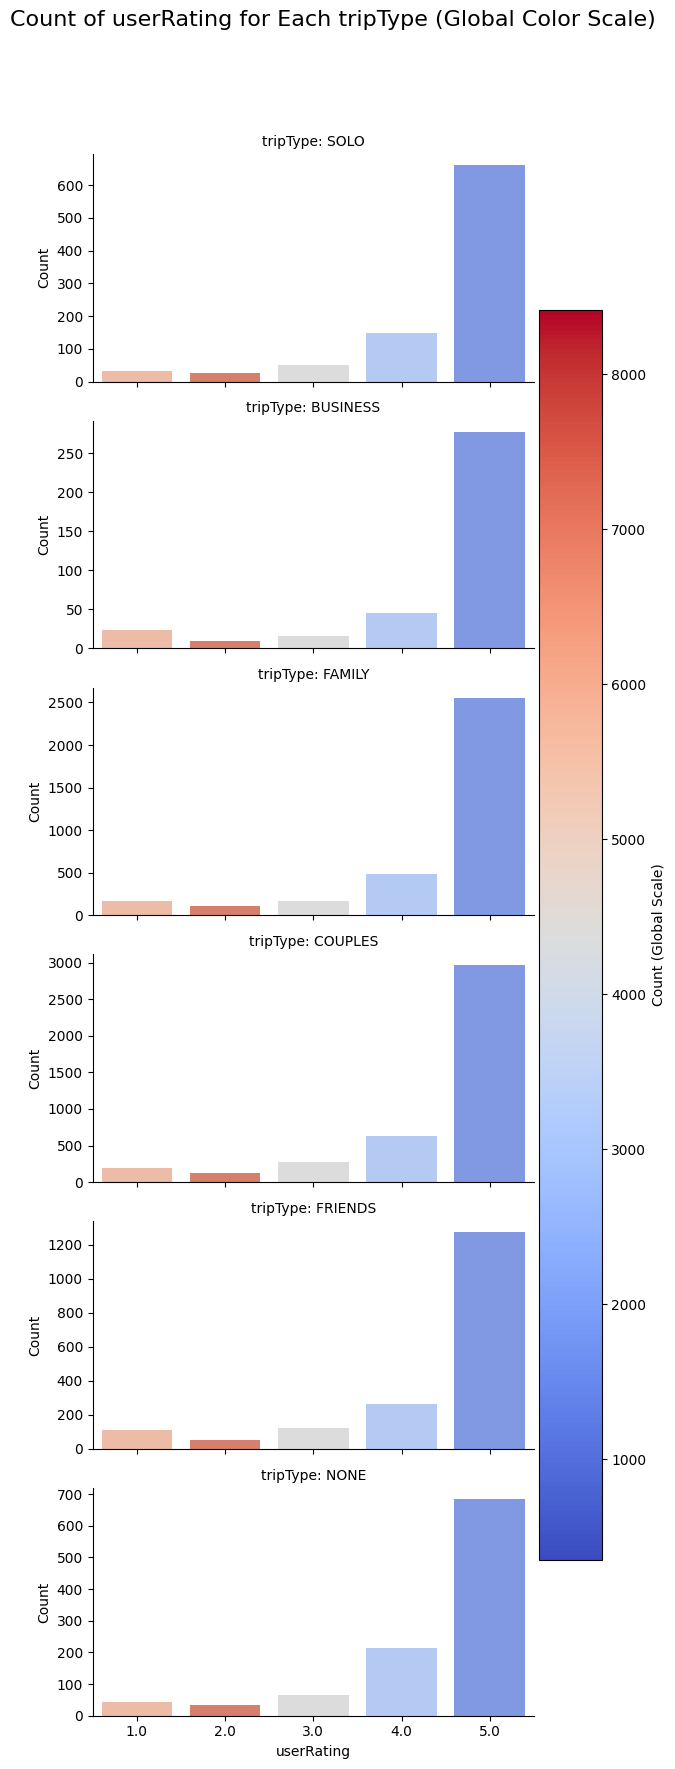

In [82]:
def facet_vertical_global_scale(x_ax, row_group):
    # Suppress warnings
    warnings.filterwarnings("ignore")
    
    # Handle missing data
    data_cleaned = df.dropna(subset=[x_ax, row_group])
    
    # Calculate global counts
    global_counts = data_cleaned[x_ax].value_counts()
    
    # Normalize global counts for consistent color mapping
    norm_counts = (global_counts - global_counts.min()) / (global_counts.max() - global_counts.min())
    colors = sns.color_palette("coolwarm", len(norm_counts))
    global_color_mapping = {val: colors[i] for i, val in enumerate(norm_counts.index)}

    # Use FacetGrid to create vertically aligned count plots
    g = sns.FacetGrid(data_cleaned, row=row_group, height=3, aspect=2, sharex=True, sharey=False)

    # Custom function to map global colors dynamically based on counts
    def custom_countplot(data, x_ax, **kwargs):
        # Calculate local counts (specific to the current facet)
        local_counts = data[x_ax].value_counts().sort_index()

        # Plot bars with globally assigned colors
        sns.barplot(
            x=local_counts.index,
            y=local_counts.values,
            palette=[global_color_mapping[val] for val in local_counts.index],
            **kwargs
        )

    # Map custom countplot function
    g.map_dataframe(custom_countplot, x_ax=x_ax)

    # Adjust titles and layout
    g.set_titles(f"{row_group}: {{row_name}}")
    g.set_axis_labels(f"{x_ax}", "Count")
    g.fig.subplots_adjust(top=0.9)  # Adjust space at the top
    g.fig.suptitle(f"Count of {x_ax} for Each {row_group} (Global Color Scale)", fontsize=16)

    # Add a colorbar for the global scale
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(global_counts.min(), global_counts.max()))
    sm.set_array([])
    cbar = g.fig.colorbar(sm, ax=g.axes, orientation='vertical', shrink=0.8, pad=0.01)
    cbar.set_label("Count (Global Scale)")

    plt.show()

facet_vertical_global_scale('userRating', 'tripType')


#### -